In [315]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None

# Data Analysis

In [2]:
ds_train = pd.read_csv("we_data/train.csv")
ds_val = pd.read_csv("we_data/validation.csv")
ds_test = pd.read_csv("we_data/test.csv")

In [3]:
dataset = {
    'train': ds_train,
    'val': ds_val,
    'test': ds_test
}

In [4]:
pd.DataFrame(ds_train['usertag'][22:26])['usertag'].str.get_dummies(sep=',')

,10006,10024,10057,10063,10077,10083,10110,10111,13403,13776,13866
22,0,0,0,0,0,0,0,0,0,0,0
23,1,1,1,1,1,1,1,0,1,0,0
24,0,0,0,0,0,0,0,1,0,0,1
25,0,0,0,0,0,0,0,0,0,1,0


In [5]:
pd.DataFrame(ds_train['usertag'][22:26])

,usertag
22,NaN
23,"10063,13403,10083,10057,10077,10006,10024,10110"
24,"13866,10111"
25,13776


In [6]:
ds_train.shape

# Number of impressions 2430981

(2430981, 25)

In [7]:
ds_train.describe()

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.381152e+06,0.0,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06,2.430981e+06
mean,7.375623e-04,2.888556e+00,1.348925e+01,1.493833e+02,1.543295e+02,2.109685e+00,NaN,5.774218e+02,1.885723e+02,2.671783e+01,2.729620e+02,7.815142e+01,2.840736e+03
std,2.714809e-02,2.055223e+00,6.567105e+00,1.020631e+02,1.033093e+02,8.764370e-01,NaN,3.216738e+02,1.314946e+02,3.704444e+01,2.891153e+01,5.984636e+01,7.841990e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.000000e+00,1.000000e+00,1.000000e+01,7.900000e+01,7.900000e+01,1.000000e+00,NaN,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.000000e+00,3.000000e+00,1.400000e+01,1.460000e+02,1.520000e+02,2.000000e+00,NaN,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,6.800000e+01,3.358000e+03
75%,0.000000e+00,5.000000e+00,1.900000e+01,2.160000e+02,2.220000e+02,3.000000e+00,NaN,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,9.900000e+01,3.427000e+03
max,1.000000e+00,6.000000e+00,2.300000e+01,3.950000e+02,3.990000e+02,4.000000e+00,NaN,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [32]:
avg_ctr = ds_train.click.mean() # 0.0007375623
# avgSlotPrice: 26.71783
# avgPayPrice: 78.15142

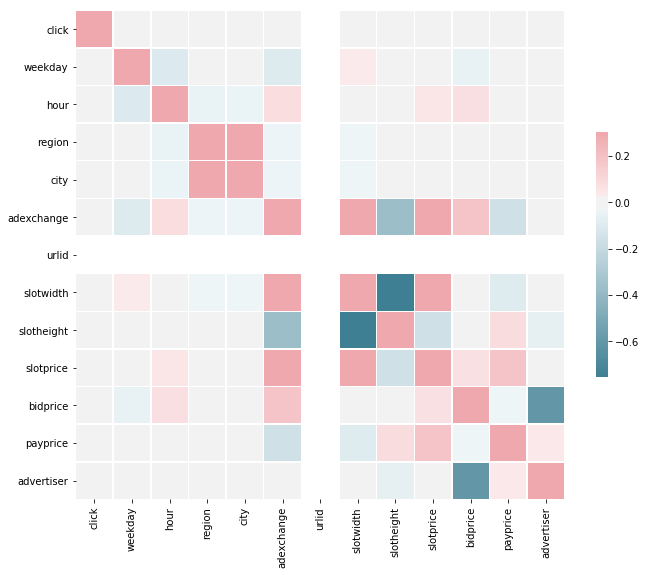

In [8]:
pearson = ds_train.corr(method='pearson')
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pearson, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Useful fields
# 'weekday', 'hour', 'region', 'city', 'slotwidth', 'slotheight', 'slotprice', 'advertiser'

In [9]:
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [10]:
for col in ds_train.columns:
    print(f'[{col}]')
    for name, df in dataset.items():
        if col in df:
            print(f'{name}: {len(df[col].unique())}')
        else: 
            print(f'{name}: N.A')
    print('')

# Useful fields here: 
# 1. adexchange
# 2. usertag

[click]
train: 2
val: 2
test: N.A

[weekday]
train: 7
val: 7
test: 7

[hour]
train: 24
val: 24
test: 24

[bidid]
train: 2430981
val: 303925
test: 303375

[userid]
train: 2342677
val: 302416
test: 301846

[useragent]
train: 38
val: 35
test: 33

[IP]
train: 503975
val: 194693
test: 194482

[region]
train: 35
val: 35
test: 35

[city]
train: 370
val: 370
test: 370

[adexchange]
train: 5
val: 5
test: 5

[domain]
train: 23013
val: 9290
test: 9239

[url]
train: 763961
val: 136905
test: 136738

[urlid]
train: 1
val: 1
test: 1

[slotid]
train: 52283
val: 15720
test: 15745

[slotwidth]
train: 21
val: 21
test: 21

[slotheight]
train: 14
val: 14
test: 14

[slotvisibility]
train: 11
val: 11
test: 11

[slotformat]
train: 4
val: 4
test: 4

[slotprice]
train: 286
val: 267
test: 258

[creative]
train: 131
val: 129
test: 129

[bidprice]
train: 8
val: 8
test: N.A

[payprice]
train: 301
val: 301
test: N.A

[keypage]
train: 19
val: 19
test: 19

[advertiser]
train: 9
val: 9
test: 9

[usertag]
train: 744036


In [11]:
field = 'advertiser'
ds_train.groupby(field)[[field, 'click']].sum()

,advertiser,click
advertiser,,
1458,717850674,385
2259,301967307,43
2261,248985842,36
2821,596263486,131
2997,149337513,217
3358,889722248,202
3386,1540768826,320
3427,1380416162,272
3476,1080462460,187


In [12]:
for name, df in dataset.items():
    tags = set()
    for x in df['usertag']:
        tags.update(str(x).split(','))
    print(f'{name}: {len(tags)}')

train: 69
val: 69
test: 69


In [13]:
# Fix useful null fields (no_necessary since we get_dummies for all of them)
# ds_train.fillna(0, inplace=True)
ds_train.isnull().sum()

click                   0
weekday                 0
hour                    0
bidid                   0
userid                  0
useragent               0
IP                      0
region                  0
city                    0
adexchange          49829
domain             137135
url                 86812
urlid             2430981
slotid                  0
slotwidth               0
slotheight              0
slotvisibility          0
slotformat              0
slotprice               0
creative                0
bidprice                0
payprice                0
keypage            504990
advertiser              0
usertag            497479
dtype: int64

In [284]:
print(f'All: Lowest payprice: {ds_train.payprice.min()}, Highest payprice: {ds_train.payprice.max()}')
print(f'Click Only: Lowest payprice: {ds_train[ds_train["click"] == 1].payprice.min()}, '
      f'Highest payprice: {ds_train[ds_train["click"] == 1].payprice.max()}')

All: Lowest payprice: 0, Highest payprice: 300
Click Only: Lowest payprice: 4, Highest payprice: 300


# Functions

In [14]:
def preprocess(data):
    df = data.copy()
    
#     Bin slot price
    bins = [-np.inf, 10, 50, 100, 150, np.inf]
    labels = ['sp_1','sp_2','sp_3','sp_4', 'sp_5']
    df['slotprice'] = pd.cut(df['slotprice'], bins=bins, labels=labels)
    
    # Obtain os and browser from useragent
    os_bow = df['useragent'].str.split('_', n=1, expand=True)
    df['os'] = os_bow[0] 
    df['browser'] = os_bow[1]
    df.drop('useragent', axis=1, inplace=True)
    
    # Keep selected fields
    selected_fields = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 
                   'slotvisibility', 'slotformat' ,'slotprice', 'keypage', 'advertiser', 'usertag', 
                   'os', 'browser']
    
    if 'click' in df:
        selected_fields.append('click')

    df = df[selected_fields]
    
    # Perform One Hot Encoding for categorical fields
    cat_cols = ['weekday', 'hour', 'region', 'city', 'adexchange', 'slotwidth', 'slotheight', 'slotvisibility',
              'slotformat', 'keypage', 'advertiser', 'os', 'browser', 'slotprice']
    
    df = pd.get_dummies(df, columns=cat_cols)
    
    # Perform One Hot Encoding for 'usertag' field
    df_users = df['usertag'].str.get_dummies(sep=',')
    df.drop('usertag', axis=1, inplace=True)
    df = pd.concat([df, df_users], axis=1)
    
    return df

In [15]:
def downsample(df, rate, random_state):
    if 'click' in df:
        df_click_0 = df[df['click'] == 0]
        df_click_1 = df[df['click'] == 1]
        df_click_0_undersample = df_click_0.sample(frac=rate, random_state=random_state)
        df = pd.concat([df_click_0_undersample, df_click_1], axis=0)
    else:
        df = df.sample(frac=rate)
    
    return df

In [114]:
def get_est_ctr(model, df, downsample_rate):
    bidids = df['bidid']
    if 'click' in df.columns:
        df = df.drop('click', axis=1)
    processed_df = preprocess(df)
    prob = pd.DataFrame(model.predict_proba(processed_df))
    prob['cctr'] = (prob[1] / (prob[1] + ((1 - prob[1]) / downsample_rate))) # calibrated ctr 
    return pd.concat([bidids, prob['cctr']], axis=1)

In [313]:
def check_clicks(df_val, df_bids, budget=6250):
    clicks, imps, budget = -1, -1, budget
    df = df_val[['bidid', 'payprice', 'click']]
    df = pd.merge(df, df_bids, on='bidid')
    df['win'] = (df['bidprice'] - df['payprice']) >= 0
    
    win_df = df[df['win'] == True]
    win_df['payprice'] = win_df['payprice'] / 1000
    
    win_df['expense'] = win_df['payprice'].cumsum()

    win_in_budget = win_df[win_df['expense'] < budget]
     
    used = win_in_budget['expense'].iloc[-1]
    imps = len(win_in_budget['expense'])
    clicks = win_in_budget['click'].sum()            
    
    return (clicks, imps, used)

In [384]:
def show_result(results, limit=10):
    for name, stats in sorted(results.items(), key=lambda x: (x[1][0], x[1][1]), reverse=True)[:limit]:
        print(f'{name}: clicks: {stats[0]}, imps: {stats[1]}, spent: {stats[2]:.2f}, ctr: {stats[0]/stats[1]:.5f}, '
              f'cpm: {stats[2]/stats[1]:.5f}, cpc: {stats[2]/stats[0]:.5f}')

# Constant Bidding (Criterion 1)

In [317]:
results = {}
for i in range (1, 200):
    const_df = ds_val[['bidid', 'bidprice']]
    const_df['bidprice'] = i
    result = check_clicks(ds_val, const_df)
    results[f'constant_{i}'] = result

In [349]:
sorted(results.items(), key=lambda x: (x[1][0], x[1][1]), reverse=True)[:10]
# Best constant bidding results (77, 79 and 78) 

[('linear_129', (159, 138040, 6249.999000002393)),
 ('linear_128', (159, 137414, 6205.558000002352)),
 ('linear_127', (159, 136647, 6155.999000002314)),
 ('linear_126', (159, 135889, 6104.40600000232)),
 ('linear_125', (159, 135191, 6054.4760000022925)),
 ('linear_124', (159, 134340, 5999.591000002271)),
 ('linear_123', (158, 133610, 5954.31400000224)),
 ('linear_122', (158, 132846, 5906.090000002213)),
 ('linear_130', (157, 137652, 6249.914000002373)),
 ('linear_121', (157, 132074, 5854.022000002178))]

# Random Bidding (criterion 1)

In [403]:
import random
# payprice range, click payprice range, +-5 around constant, +- 10 around constant, +- 20 around constant
# random_72-82_5: clicks: 68, imps: 149525, spent: 6249.97, ctr: 0.00045, cpm: 0.04180, cpc: 91.91129
# random_72-82_3: clicks: 67, imps: 149549, spent: 6249.97, ctr: 0.00045, cpm: 0.04179, cpc: 93.28318

random_ranges = [(0, 300), (4, 300), (72, 82), (67, 87), (57, 97)]
results = {}

for x, y in random_ranges:
    for i in range (1,6):
        rand_df = ds_val[['bidid', 'bidprice']]
        rand_df['bidprice'] = np.random.randint(x, y, size=(len(ds_val), 1))
        result = check_clicks(ds_val, rand_df)
        results[f'random_{x}-{y}_{i}'] = result

In [406]:
show_result(results)

random_72-82_5: clicks: 68, imps: 149525, spent: 6249.97, ctr: 0.00045, cpm: 0.04180, cpc: 91.91129
random_72-82_3: clicks: 67, imps: 149549, spent: 6249.97, ctr: 0.00045, cpm: 0.04179, cpc: 93.28318
random_57-97_5: clicks: 67, imps: 149470, spent: 6249.96, ctr: 0.00045, cpm: 0.04181, cpc: 93.28297
random_67-87_1: clicks: 66, imps: 150140, spent: 6249.95, ctr: 0.00044, cpm: 0.04163, cpc: 94.69626
random_57-97_1: clicks: 66, imps: 149567, spent: 6249.95, ctr: 0.00044, cpm: 0.04179, cpc: 94.69618
random_72-82_4: clicks: 65, imps: 149534, spent: 6249.99, ctr: 0.00043, cpm: 0.04180, cpc: 96.15371
random_67-87_2: clicks: 64, imps: 150053, spent: 6249.94, ctr: 0.00043, cpm: 0.04165, cpc: 97.65531
random_72-82_1: clicks: 64, imps: 149579, spent: 6249.94, ctr: 0.00043, cpm: 0.04178, cpc: 97.65534
random_67-87_3: clicks: 62, imps: 150109, spent: 6249.99, ctr: 0.00041, cpm: 0.04164, cpc: 100.80626
random_67-87_4: clicks: 62, imps: 150079, spent: 6249.95, ctr: 0.00041, cpm: 0.04164, cpc: 100.8056

# Random Bidding Criterion 2

In [430]:
x = np.random.randint(1, 10, size=5)

In [431]:
x

array([6, 4, 8, 2, 7])

In [432]:
1+x

array([7, 5, 9, 3, 8])

In [524]:
multi_bids = ds_val[['bidid', 'payprice', 'click']]
lower, upper = 72, 82

import math

num_p = 30
players = [ i for i in range(0,num_p) ]

rand_df = ds_val[['bidid', 'payprice']].set_index('bidid')
new_df = pd.DataFrame(np.random.randint(lower, upper, size=(len(ds_val), num_p)), columns=players)
multi_bids = pd.concat([multi_bids, new_df], axis=1)

# multi_bids['bids'] = multi_bids[players].values.tolist()
multi_bids

,bidid,payprice,click,0,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,29
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,23,0,76,81,77,77,80,74,78,...,80,79,75,78,77,79,78,73,74,72
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,75,0,75,78,72,72,76,78,78,...,79,80,78,75,78,77,73,75,74,80
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,65,0,74,79,77,78,78,77,76,...,79,81,79,75,72,79,76,77,80,73
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,6,0,76,73,72,74,75,76,78,...,72,77,74,74,72,78,79,73,81,74
4,0899bf144249458ea9c89188473694bf44c7ca15,5,0,76,73,74,78,79,81,78,...,78,73,81,78,81,73,77,79,72,78
5,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,22,0,77,81,77,81,77,75,72,...,81,79,76,72,81,76,74,76,78,81
6,786a2940f225482dc04d455dc7a7fea436b02e03,31,0,76,81,75,72,79,76,74,...,81,80,77,79,74,76,79,78,81,80
7,17ada861c6ed0616f88312ba0d3d76c0f95b4940,20,0,73,77,77,80,73,78,72,...,74,73,77,75,72,75,74,79,74,79
8,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,58,0,73,79,73,81,79,74,80,...,76,76,75,78,75,80,76,81,79,72
9,442ffca310e325abc255e8ff97d9812051336acd,55,0,72,80,78,76,77,75,81,...,77,78,81,79,81,74,78,76,81,76


In [525]:
result = {}
for p in players:
    x = multi_bids
    
    for i in players:
        x = x[x[p] >= x[i]]
        
    x.drop(p, axis=1, inplace=True)
    x['cost'] = df.max(axis=1)
    x['cost'] = x['cost'] + x['payprice']
     
    result[p] = {'clicks': x["click"].sum(), 
                 'spent': x["cost"].sum() / 1000,
                 'ims': len(x)
                }


In [526]:
# 30 players
pd.DataFrame.from_dict(result, orient='index')


,clicks,spent,ims
0,23,5461.258553,32140
1,21,5358.905914,31662
2,17,5411.418507,31688
3,19,5390.621324,32044
4,20,5359.878090,31720
5,20,5424.783288,31958
6,16,5314.230092,31559
7,21,5359.674183,31647
8,18,5364.268632,31824
9,13,5398.418401,31910


In [523]:
# 50 players
pd.DataFrame.from_dict(result, orient='index')


,clicks,spent,ims
0,18,5082.209310,30380
1,16,5117.794049,30128
2,22,5144.637853,30645
3,24,5166.215104,30657
4,18,5134.857904,30545
5,21,5242.779215,30883
6,23,5203.211053,30636
7,16,5186.873945,30911
8,23,5170.475846,30611
9,18,5093.541235,30407


In [423]:
test = multi_bids.T

In [425]:
test.head()

bidid,bbcb813b6166538503d8b33a5602d7d72f6019dc,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,0899bf144249458ea9c89188473694bf44c7ca15,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,786a2940f225482dc04d455dc7a7fea436b02e03,17ada861c6ed0616f88312ba0d3d76c0f95b4940,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,442ffca310e325abc255e8ff97d9812051336acd,...,2d161cfcd444b42f49fcf4f1e5144033e4ce1990,3badeecdc0a5c8db18824c8f40f72f5fc1dfc5e5,e8d9c44b53a2334933dbf5c7715edf94b94ae9a7,88f2afac5d2cc9481b9c5ee8e340cc96263de277,25d3ab7fe651e0719afedabd1e34f107a0a2553a,1e6d630083e75b7798f42b8c1f2742b51f775442,e90e5fe0fcdd8f889833d72e1179de256419f371,da805763c592a6036dc2bc25ae838a0ef0b277fc,5b868d10889be254db99e4147f148e9a14c2bcec,5dd719412dff3cd6287564812e15f87c33c29405
payprice,23,75,65,6,5,22,31,20,58,55,...,5,20,17,50,64,50,41,108,50,40
p0_bid,100,152,142,83,82,99,108,97,135,132,...,82,97,94,127,141,127,118,185,127,117
p1_bid,100,152,142,83,82,99,108,97,135,132,...,82,97,94,127,141,127,118,185,127,117
p2_bid,104,156,146,87,86,103,112,101,139,136,...,86,101,98,131,145,131,122,189,131,121
p3_bid,95,147,137,78,77,94,103,92,130,127,...,77,92,89,122,136,122,113,180,122,112


# CTR Classifier Training

In [16]:
processed_train_df = preprocess(ds_train)

In [17]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [27]:
downsample_rate = 0.0005
random_state = 42

rates = [0.0005]

for downsample_rate in rates:
    train_df = downsample(processed_train_df, downsample_rate, random_state)
    print('Rate:', downsample_rate)
    print('Shape:', train_df.shape)
    val_df = preprocess(ds_val)
    X_train = train_df.drop('click', axis=1)
    y_train = train_df['click']
    X_test = val_df.drop('click', axis=1)
    y_test = val_df['click']

    logmodel = LogisticRegression(solver='lbfgs', max_iter=1500, random_state=42)
    xgbmodel = XGBClassifier(n_jobs=4, random_state=42)

    models = [('log', logmodel), ('xgb', xgbmodel)]

    for name, model in models:
        model.fit(X_train, y_train)


    for name, model in models:
        y_pred = model.predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)

        print(f'Model: {name}, AUC Score: {roc_auc}')
        print(confusion_matrix(y_test, y_pred))

Rate: 0.0005
Shape: (3008, 606)
Model: log, AUC Score: 0.742406716150917
[[204385  99338]
 [    38    164]]
Model: xgb, AUC Score: 0.7785277527663869
[[224823  78900]
 [    37    165]]


In [322]:
# XGB gave the best score. To use XGB model for prediction
pred_df = get_est_ctr(xgbmodel, ds_val, downsample_rate)


# Linear Bidding Strategy

In [324]:
def linear(kpi, avg_kpi, base_bid):
    return base_bid * kpi / avg_kpi

In [387]:
# Linear bidding strategy
# Best results: 
# linear_129: clicks: 159, imps: 138040, spent: 6250.00, ctr: 0.00115, cpm: 0.04528, cpc: 39.30817
# linear_128: clicks: 159, imps: 137414, spent: 6205.56, ctr: 0.00116, cpm: 0.04516, cpc: 39.02867
# linear_127: clicks: 159, imps: 136647, spent: 6156.00, ctr: 0.00116, cpm: 0.04505, cpc: 38.71697

avg_ctr = ds_train.click.mean()
print(f'avg_ctr: {avg_ctr}')
      
results = {}
      
for base_bid in range(100, 135, 1):
    pred_df['bidprice'] = pred_df['cctr'].apply(linear, args=(avg_ctr, base_bid))
    result = check_clicks(ds_val, pred_df)
    results[f'linear_{base_bid}'] = result

avg_ctr: 0.0007375623256619447


In [388]:
show_result(results)

linear_129: clicks: 159, imps: 138040, spent: 6250.00, ctr: 0.00115, cpm: 0.04528, cpc: 39.30817
linear_128: clicks: 159, imps: 137414, spent: 6205.56, ctr: 0.00116, cpm: 0.04516, cpc: 39.02867
linear_127: clicks: 159, imps: 136647, spent: 6156.00, ctr: 0.00116, cpm: 0.04505, cpc: 38.71697
linear_126: clicks: 159, imps: 135889, spent: 6104.41, ctr: 0.00117, cpm: 0.04492, cpc: 38.39249
linear_125: clicks: 159, imps: 135191, spent: 6054.48, ctr: 0.00118, cpm: 0.04478, cpc: 38.07847
linear_124: clicks: 159, imps: 134340, spent: 5999.59, ctr: 0.00118, cpm: 0.04466, cpc: 37.73328
linear_123: clicks: 158, imps: 133610, spent: 5954.31, ctr: 0.00118, cpm: 0.04456, cpc: 37.68553
linear_122: clicks: 158, imps: 132846, spent: 5906.09, ctr: 0.00119, cpm: 0.04446, cpc: 37.38032
linear_130: clicks: 157, imps: 137652, spent: 6249.91, ctr: 0.00114, cpm: 0.04540, cpc: 39.80837
linear_121: clicks: 157, imps: 132074, spent: 5854.02, ctr: 0.00119, cpm: 0.04432, cpc: 37.28676


# Non-Linear Bidding Strategy

In [221]:
# >>> s.apply(subtract_custom_value, args=(5,))
def ortb1(kpi, l, c):
    x = c / l * kpi + pow(c, 2)
    return pow(x, 0.5) - c

In [222]:
def ortb2(kpi, l, c):
    x1 = kpi + pow(pow(c, 2) * pow(l, 2) + pow(kpi, 2), 0.5)
    x2 = c * l
    return c * ( pow(x1/x2, 1/3) - pow(x2/x1, 1/3) )

In [395]:
# Finding calibration for l and c value in ORTB1 equation
# Studying ranges (1e-8 to 1e-5): Best results
# 2e-06l_100c: clicks: 158, imps: 144609, spent: 6249.97, ctr: 0.00109, cpm: 0.04322, cpc: 39.55675
# 2e-06l_95c: clicks: 158, imps: 144342, spent: 6193.43, ctr: 0.00109, cpm: 0.04291, cpc: 39.19894
# 2e-06l_90c: clicks: 156, imps: 143160, spent: 6103.36, ctr: 0.00109, cpm: 0.04263, cpc: 39.12410
# 2e-06l_85c: clicks: 155, imps: 141876, spent: 6001.99, ctr: 0.00109, cpm: 0.04230, cpc: 38.72253
                            
results = {}

for scale in [1e-7]:
    for l in range(20, 100, 10):
        l = l * scale
        for c in range(100, 200, 10):
            pred_df['bidprice'] = pred_df['cctr'].apply(ortb1, args=(l, c))
            result = check_clicks(ds_val, pred_df)
            if result[0] == -1:
                break
            results[f'{l}l_{c}c'] = result 

In [396]:
print('ORTB 1 Results')
show_result(results)

ORTB 1 Results
2e-06l_100c: clicks: 158, imps: 144609, spent: 6249.97, ctr: 0.00109, cpm: 0.04322, cpc: 39.55675
2e-06l_110c: clicks: 153, imps: 142915, spent: 6249.92, ctr: 0.00107, cpm: 0.04373, cpc: 40.84916
3e-06l_190c: clicks: 150, imps: 119880, spent: 4821.44, ctr: 0.00125, cpm: 0.04022, cpc: 32.14295
3e-06l_180c: clicks: 150, imps: 119210, spent: 4771.12, ctr: 0.00126, cpm: 0.04002, cpc: 31.80745
3e-06l_170c: clicks: 150, imps: 118429, spent: 4713.40, ctr: 0.00127, cpm: 0.03980, cpc: 31.42265
3e-06l_160c: clicks: 149, imps: 117671, spent: 4654.94, ctr: 0.00127, cpm: 0.03956, cpc: 31.24121
3e-06l_150c: clicks: 148, imps: 116833, spent: 4592.28, ctr: 0.00127, cpm: 0.03931, cpc: 31.02895
3e-06l_140c: clicks: 148, imps: 115818, spent: 4516.55, ctr: 0.00128, cpm: 0.03900, cpc: 30.51725
3e-06l_130c: clicks: 148, imps: 114621, spent: 4429.46, ctr: 0.00129, cpm: 0.03864, cpc: 29.92876
3e-06l_120c: clicks: 148, imps: 113368, spent: 4340.77, ctr: 0.00131, cpm: 0.03829, cpc: 29.32955


In [397]:
# Finding calibration for lambda and c value in ORTB2 equation
# 3e-06l_90c: clicks: 155, imps: 143269, spent: 5978.37, ctr: 0.00108, cpm: 0.04173, cpc: 38.57010
# 2.4999999999999998e-06l_70c: clicks: 152, imps: 149213, spent: 6249.97, ctr: 0.00102, cpm: 0.04189, cpc: 41.11823

results = {}

for scale in [1e-7]:
    for l in range(30, 40, 1):
        l = l * scale
        for c in range(10, 210, 10):
            pred_df['bidprice'] = pred_df['cctr'].apply(ortb2, args=(l, c))
            result = check_clicks(ds_val, pred_df)
            if result[0] == -1:
                break
            results[f'{l}l_{c}c'] = result

In [398]:
print('ORTB 2 Results')
show_result(results)

ORTB 2 Results
3.3999999999999996e-06l_150c: clicks: 160, imps: 141861, spent: 6174.66, ctr: 0.00113, cpm: 0.04353, cpc: 38.59163
3.2999999999999997e-06l_140c: clicks: 159, imps: 143271, spent: 6249.98, ctr: 0.00111, cpm: 0.04362, cpc: 39.30804
3.3999999999999996e-06l_160c: clicks: 159, imps: 142402, spent: 6249.95, ctr: 0.00112, cpm: 0.04389, cpc: 39.30785
3.5e-06l_190c: clicks: 159, imps: 141371, spent: 6249.83, ctr: 0.00112, cpm: 0.04421, cpc: 39.30713
3.5e-06l_200c: clicks: 159, imps: 140818, spent: 6249.99, ctr: 0.00113, cpm: 0.04438, cpc: 39.30811
3.2e-06l_120c: clicks: 158, imps: 144179, spent: 6215.20, ctr: 0.00110, cpm: 0.04311, cpc: 39.33668
3.2e-06l_130c: clicks: 158, imps: 143359, spent: 6249.99, ctr: 0.00110, cpm: 0.04360, cpc: 39.55687
3.2999999999999997e-06l_130c: clicks: 158, imps: 142722, spent: 6160.76, ctr: 0.00111, cpm: 0.04317, cpc: 38.99216
3.5e-06l_180c: clicks: 158, imps: 141194, spent: 6206.88, ctr: 0.00112, cpm: 0.04396, cpc: 39.28408
3.3999999999999996e-06l_1

# Generate Submission File 

In [375]:
models = {
    'xgb': xgbmodel,
    'log': logmodel
}

bid_strat = {
    'linear': (linear, (0.0007375623256619447, 129)), # Linear bidding 
    'ortb1':  (ortb1, (2e-06, 90)), # ORTB 1,
    'ortb2':  (ortb2, (3e-06, 90)) # ORTB 2,
}

test_model = 'xgb'
test_strat = 'linear'
downsample_rate = 0.0005 # Best AUC from testing

In [376]:
test_df = get_est_ctr(models[test_model], ds_test, downsample_rate)
test_df['bidprice'] = test_df['cctr'].apply(bid_strat[test_strat][0], args=bid_strat[test_strat][1])
test_df['bidprice'] = test_df['bidprice'].apply(lambda x: 301 if x > 300 else x)
test_df[['bidid', 'bidprice']].to_csv(f'./test_bids_{test_model}_{test_strat}.csv', index=False, header=True)
print('Finish generating test_bids file')

Finish generating test_bids file
